<a href="https://colab.research.google.com/github/caalr11/FisicaComputacional1/blob/master/Actividad4_CarlosArias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
url ="https://raw.githubusercontent.com/caalr11/FisicaComputacional1/master/Actividad1/data%20guaymas.txt"
col =  ['Fecha', 'Precip', 'Evap', 'Tmax', 'Tmin'] 
df_tarea = pd.read_csv(url, names=col, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=1, engine='python')

In [55]:
df_ca0 = df_tarea.copy()
df_ca0.tail()

,Fecha,Precip,Evap,Tmax,Tmin
17874,26/09/2016,0,Nulo,37,20
17875,27/09/2016,0,Nulo,37,20
17876,28/09/2016,0,Nulo,38,20
17877,29/09/2016,0,Nulo,37,24
17878,30/09/2016,0,Nulo,37,21


In [56]:
str_Nulo = 'Nulo'
df_ca1 = df_ca0.replace(to_replace=str_Nulo, value='', regex=True)
df_ca1.tail()

,Fecha,Precip,Evap,Tmax,Tmin
17874,26/09/2016,0,,37,20
17875,27/09/2016,0,,37,20
17876,28/09/2016,0,,38,20
17877,29/09/2016,0,,37,24
17878,30/09/2016,0,,37,21


In [57]:
cols_list = ['Precip', 'Evap', 'Tmax', 'Tmin']
for cols in cols_list:
  df_ca1[cols] = pd.to_numeric(df_ca1[cols], errors='coerce')

df_ca1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17879 entries, 0 to 17878
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fecha   17879 non-null  object 
 1   Precip  17847 non-null  float64
 2   Evap    5731 non-null   float64
 3   Tmax    17823 non-null  float64
 4   Tmin    17828 non-null  float64
dtypes: float64(4), object(1)
memory usage: 698.5+ KB


In [58]:
df_ca2 = df_ca1.copy()

df_ca2['Fecha'].head()

0    01/02/1967
1    02/02/1967
2    03/02/1967
3    04/02/1967
4    05/02/1967
Name: Fecha, dtype: object

In [59]:
df_ca2['Fecha'] = pd.to_datetime(df_ca2['Fecha'], dayfirst=True).copy()
print(df_ca2.head())

       Fecha  Precip  Evap  Tmax  Tmin
0 1967-02-01     0.0   NaN  20.0   8.0
1 1967-02-02     0.0   NaN  21.0   9.0
2 1967-02-03     0.0   NaN  26.0   8.0
3 1967-02-04     0.0   NaN  25.0   7.0
4 1967-02-05     0.0   NaN  23.0   7.0


In [60]:
df_ca2['Año'] = df_ca2['Fecha'].dt.year
df_ca2['Mes'] = df_ca2['Fecha'].dt.month

In [61]:
print(df_ca2.head())
print(df_ca2.tail())

       Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
0 1967-02-01     0.0   NaN  20.0   8.0  1967    2
1 1967-02-02     0.0   NaN  21.0   9.0  1967    2
2 1967-02-03     0.0   NaN  26.0   8.0  1967    2
3 1967-02-04     0.0   NaN  25.0   7.0  1967    2
4 1967-02-05     0.0   NaN  23.0   7.0  1967    2
           Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
17874 2016-09-26     0.0   NaN  37.0  20.0  2016    9
17875 2016-09-27     0.0   NaN  37.0  20.0  2016    9
17876 2016-09-28     0.0   NaN  38.0  20.0  2016    9
17877 2016-09-29     0.0   NaN  37.0  24.0  2016    9
17878 2016-09-30     0.0   NaN  37.0  21.0  2016    9


In [62]:
df_ca3=df_ca2.copy()

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
df_ca3.drop('Mes', axis=1, inplace=True)
df_ca3['Mes'] = df_ca3['Fecha'].dt.strftime('%b')
df_ca3.info()
print(df_ca3.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17879 entries, 0 to 17878
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   17879 non-null  datetime64[ns]
 1   Precip  17847 non-null  float64       
 2   Evap    5731 non-null   float64       
 3   Tmax    17823 non-null  float64       
 4   Tmin    17828 non-null  float64       
 5   Año     17879 non-null  int64         
 6   Mes     17879 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 977.9+ KB
       Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
0 1967-02-01     0.0   NaN  20.0   8.0  1967  Feb
1 1967-02-02     0.0   NaN  21.0   9.0  1967  Feb
2 1967-02-03     0.0   NaN  26.0   8.0  1967  Feb
3 1967-02-04     0.0   NaN  25.0   7.0  1967  Feb
4 1967-02-05     0.0   NaN  23.0   7.0  1967  Feb


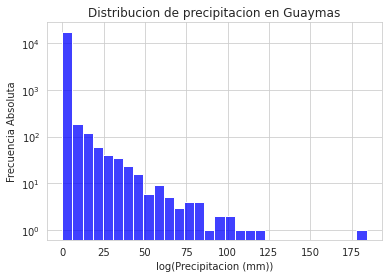

In [72]:
#precipitacion
sns.histplot(df_ca3['Precip'],kde=False,color='blue', bins=30)
plt.title('Distribucion de precipitacion en Guaymas')
plt.yscale('log')
plt.xlabel('log(Precipitacion (mm))')
plt.ylabel('Frecuencia Absoluta')
plt.grid(1)
plt.show()

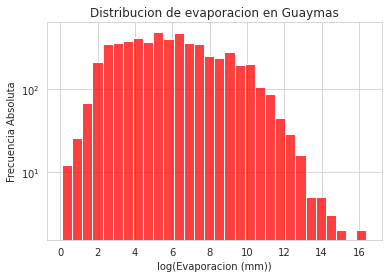

In [73]:
#Evaporacion
sns.histplot(df_ca3['Evap'],kde=False,color='red', bins=30)
plt.title('Distribucion de evaporacion en Guaymas')
plt.yscale('log')
plt.xlabel('log(Evaporacion (mm))')
plt.ylabel('Frecuencia Absoluta')
plt.grid(1)
plt.show()

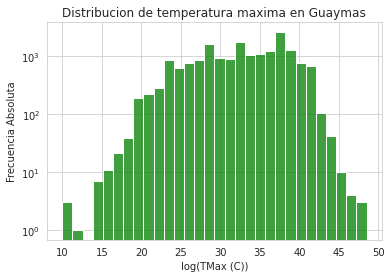

In [74]:
#Temperatura Maxima
sns.histplot(df_ca3['Tmax'],kde=False,color='green', bins=30)
plt.title('Distribucion de temperatura maxima en Guaymas')
plt.yscale('log')
plt.xlabel('log(TMax (C))')
plt.ylabel('Frecuencia Absoluta')
plt.grid(1)
plt.show()

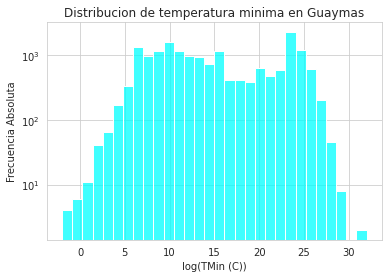

In [75]:
#Temperatura Minima
sns.histplot(df_ca3['Tmin'],kde=False,color='cyan', bins=30)
plt.title('Distribucion de temperatura minima en Guaymas')
plt.yscale('log')
plt.xlabel('log(TMin (C))')
plt.ylabel('Frecuencia Absoluta')
plt.grid(1)
plt.show()

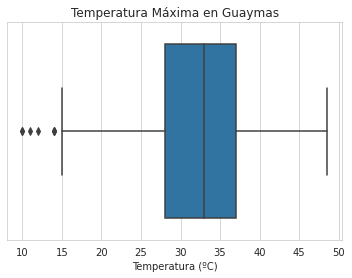

In [76]:
sns.set_style("whitegrid")

sns.boxplot(x=df_ca3.Tmax, data=df_ca3, orient='h').set(xlabel='Temperatura (ºC)', 
                                                     title='Temperatura Máxima en Guaymas');

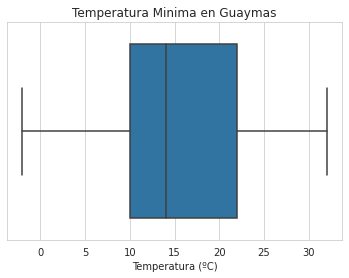

In [77]:
sns.set_style("whitegrid")

sns.boxplot(x=df_ca3.Tmin, data=df_ca3, orient='h').set(xlabel='Temperatura (ºC)', 
                                                     title='Temperatura Minima en Guaymas');

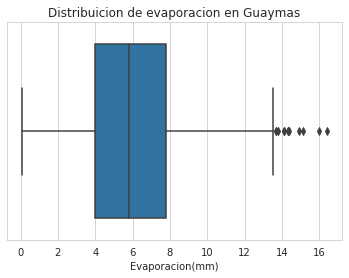

In [78]:
sns.set_style("whitegrid")

sns.boxplot(x=df_ca3.Evap, data=df_ca3, orient='h').set(xlabel='Evaporacion(mm)', 
                                                     title='Distribuicion de evaporacion en Guaymas');

In [79]:
df_67 = df_ca3[(df_ca3['Año'] >= 1967) & (df_ca3['Año'] < 1990)]
df_90 = df_ca3[(df_ca3['Año'] >= 1990) & (df_ca3['Año'] < 2016)]

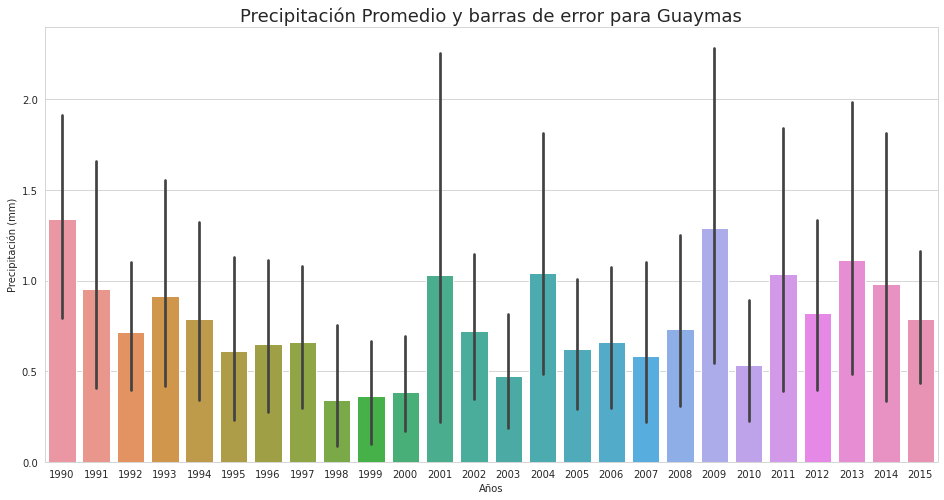

In [80]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.barplot(x='Año', y='Precip', data=df_90);
# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para Guaymas', fontsize=18)

plt.show()

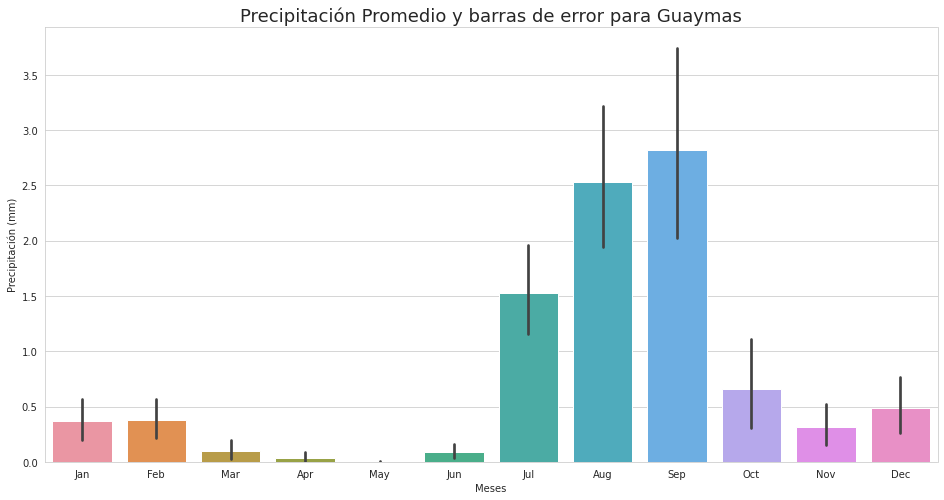

In [83]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.barplot(x='Mes', y='Precip', data=df_90);

plt.xlabel('Meses')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para Guaymas', fontsize=18)

plt.show()

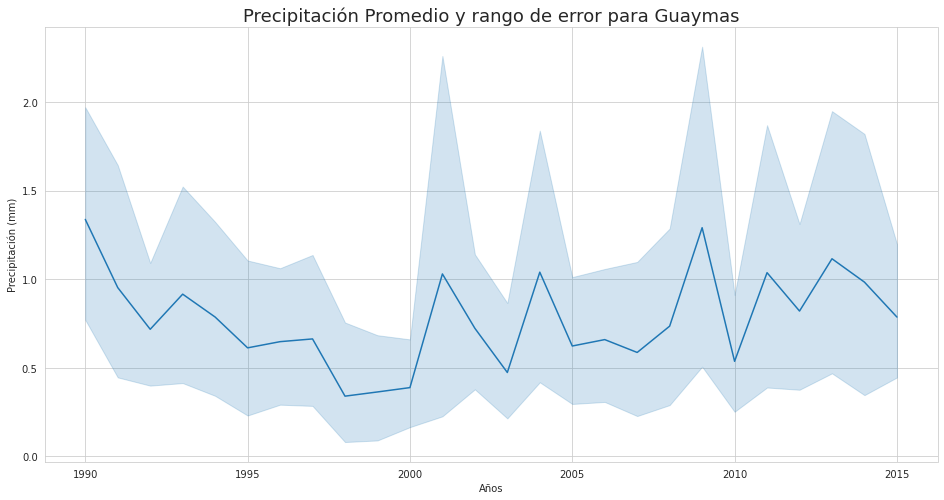

In [82]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.lineplot(x='Año', y='Precip', data=df_90);

plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y rango de error para Guaymas', fontsize=18)

plt.show()

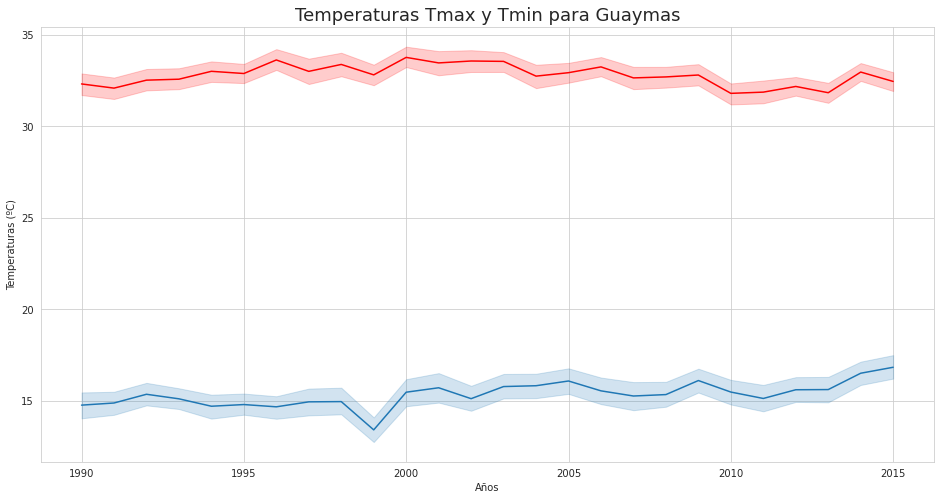

In [84]:
# Gráfica de Temperaturas de últimos 30 años
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

sns.lineplot(x='Año', y='Tmax', data=df_90, color='r');
sns.lineplot(x='Año', y='Tmin', data=df_90);

plt.xlabel('Años')
plt.ylabel('Temperaturas (ºC)')
plt.title('Temperaturas Tmax y Tmin para Guaymas', fontsize=18)

plt.show()

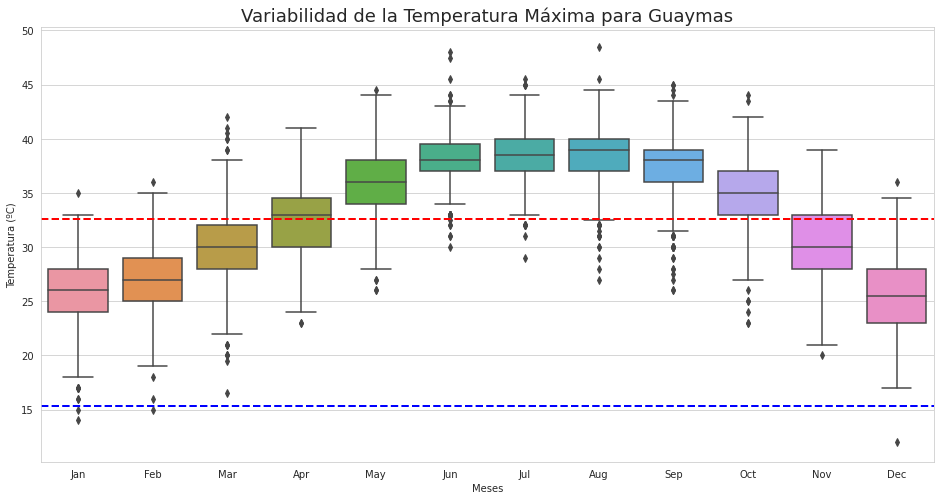

mean(Tmax) =  32.62407002188184
mean(Tmin) =  15.33293695310747
Diff Tmax_ave-Tmin_ave =  17.29113306877437


In [86]:
# Gráfica de Temepraturas Máximas en los últimos 30 años
# Agrupado por Mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

# Promedio de Tmax y Tmin
Tmax_ave = df_ca3.Tmax.mean()
Tmin_ave = df_ca3.Tmin.mean()

# Gráfica de cajas de la Temperatura 
g=sns.boxplot(x='Mes', y='Tmax', data=df_90);
# Linea de Tmax promedio 
plt.axhline(Tmax_ave, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Tmin_ave, color = 'b', linestyle='--', linewidth=2);

plt.xlabel('Meses')
plt.ylabel('Temperatura (ºC)')
plt.title('Variabilidad de la Temperatura Máxima para Guaymas', fontsize=18)

plt.show()

# Imprimir información de Temperaturas
print('mean(Tmax) = ', Tmax_ave)
print('mean(Tmin) = ', Tmin_ave)
print('Diff Tmax_ave-Tmin_ave = ', (Tmax_ave - Tmin_ave))

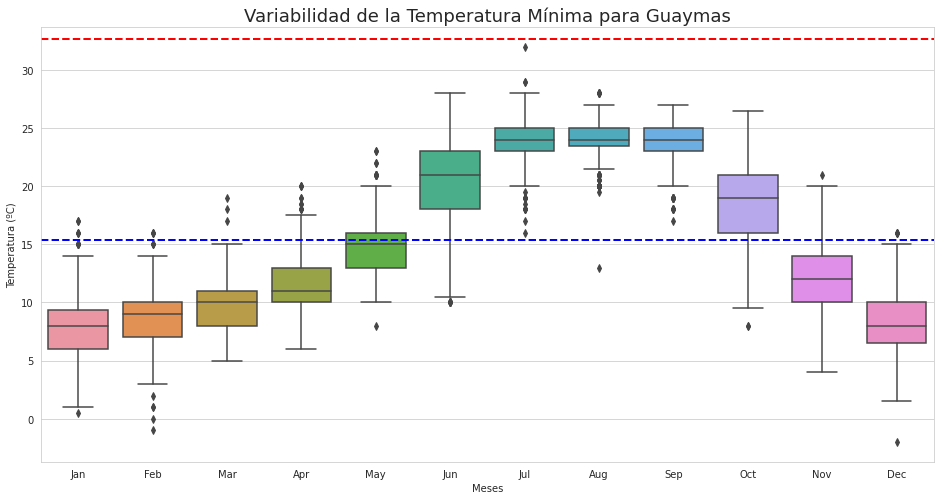

mean(Tmax) =  32.62407002188184
mean(Tmin) =  15.33293695310747
Diff Tmax_ave-Tmin_ave =  17.29113306877437


In [87]:
#Gráfica de Temperaturas Mínimas en los últimos 30 años
# Agrupado por Mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

# Promedio de Tmax y Tmin
Tmax_ave = df_ca3.Tmax.mean()
Tmin_ave = df_ca3.Tmin.mean()

# Gráfica de cajas de la Temperatura 
g=sns.boxplot(x='Mes', y='Tmin', data=df_90);
# Linea de Tmin promedio 
plt.axhline(Tmax_ave, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Tmin_ave, color = 'b', linestyle='--', linewidth=2);

plt.xlabel('Meses')
plt.ylabel('Temperatura (ºC)')
plt.title('Variabilidad de la Temperatura Mínima para Guaymas', fontsize=18)

plt.show()

# Imprimir información de Temperaturas
print('mean(Tmax) = ', Tmax_ave)
print('mean(Tmin) = ', Tmin_ave)
print('Diff Tmax_ave-Tmin_ave = ', (Tmax_ave - Tmin_ave))

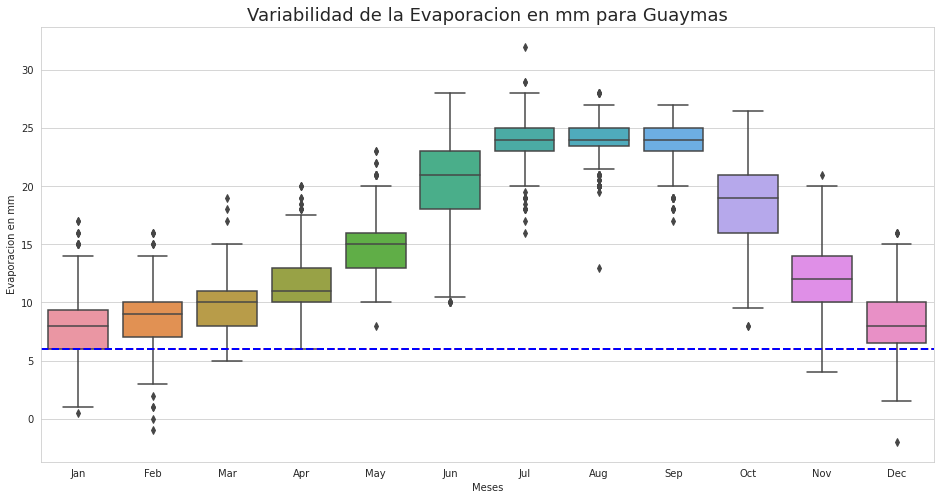

mean(Emax) =  5.982603385098593
mean(Emin) =  5.982603385098593
Diff Emax_ave-Emin_ave =  0.0


In [89]:
#Gráfica de Evaporacion en los últimos 30 años
# Agrupado por Mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

# Promedio de Emax y Emin
Emax_ave = df_ca3.Evap.mean()
Emin_ave = df_ca3.Evap.mean()

# Gráfica de cajas de la Temperatura 
g=sns.boxplot(x='Mes', y='Tmin', data=df_90);
# Linea de Tmin promedio 
plt.axhline(Emax_ave, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Emin_ave, color = 'b', linestyle='--', linewidth=2);

plt.xlabel('Meses')
plt.ylabel('Evaporacion en mm')
plt.title('Variabilidad de la Evaporacion en mm para Guaymas', fontsize=18)

plt.show()

# Imprimir información de Temperaturas
print('mean(Emax) = ', Emax_ave)
print('mean(Emin) = ', Emin_ave)
print('Diff Emax_ave-Emin_ave = ', (Emax_ave - Emin_ave))